In [1]:
import os
import json
import os.path as osp
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import utils

db_dir = osp.abspath(osp.join('..', 'db-checkpoints'))
assert osp.exists(db_dir)
# os.listdir(db_dir)
path = osp.join(db_dir, 'db-2024-08-17:11:04.sqlite3')
assert osp.exists(path)

save_dir = 'concentration-volume'
if not os.path.exists(save_dir):
    os.mkdir(save_dir)

sql_query = '''SELECT * FROM "results" r
    LEFT JOIN "result_comments" rc
        ON r.id = rc.result_id
'''

with sqlite3.connect(path) as con:
    df = pd.read_sql(sql_query, con)

df

,id,experiment_number,centrifuge_minutes,centrifuge_rpm,dispense_bulk,volume,protein_name,dispense_ligands,protein_days_thawed,well_volume,...,auc_mean,auc_cv,std_405,dd_soret,fig,visited,ok,id,result_id,comment
0,1,3,NaN,NaN,None,NaN,None,None,2,NaN,...,0.436091,0.802581,0.001378,0.000132,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,0,1.0,NaN,NaN,None
1,2,3,NaN,NaN,None,NaN,None,None,2,NaN,...,37.665803,0.067667,0.008379,0.001065,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,0,1.0,NaN,NaN,None
2,3,3,NaN,NaN,None,NaN,None,None,2,NaN,...,34.967277,0.070659,0.007526,0.001803,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,0,1.0,NaN,NaN,None
3,4,3,NaN,NaN,None,NaN,None,None,2,NaN,...,30.399167,0.026657,0.003079,-0.000334,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,0,1.0,NaN,NaN,None
4,5,3,NaN,NaN,None,NaN,None,None,2,NaN,...,32.132123,0.028020,0.004944,-0.001453,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,0,1.0,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,934,21,2.0,3700.0,Clariostar Injector,40.0,None,Echo,0,40.0,...,21.666054,0.025333,0.002434,-0.000879,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,0,0.0,758.0,934.0,no response
1157,935,21,2.0,3700.0,Clariostar Injector,40.0,None,Echo,0,40.0,...,21.510966,0.037124,0.003901,-0.002130,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,0,0.0,759.0,935.0,no response
1158,936,21,2.0,3700.0,Clariostar Injector,40.0,None,Echo,0,40.0,...,20.762331,0.026466,0.003571,-0.001182,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,0,0.0,760.0,936.0,no response
1159,937,21,2.0,3700.0,Clariostar Injector,40.0,None,Echo,0,40.0,...,21.206323,0.088266,0.008769,-0.003660,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,0,0.0,761.0,937.0,no response


In [2]:
df['protein_concentration'].isna().sum() / len(df)

0.17829457364341086

In [3]:
frac_missing_vol = df['volume'].isna().sum() / len(df)
frac_missing_protein_concentration = df['protein_concentration'].isna().sum() / len(df)

print(f'''Missing data: 
Volume: {frac_missing_vol:.1%}
Protein Concentration: {frac_missing_protein_concentration:.1%}
''')

Missing data: 
Volume: 36.1%
Protein Concentration: 17.8%



## Missing data
For now I'm going to carry on, then later I'll try to fix the missing values.

Ignore Mis-dispensed experiments

In [5]:
x = df.query('not volume.isna() and not protein_concentration.isna() and comment != "mis dispense protein"')
print(len(x))
x.head()

655


,id,experiment_number,centrifuge_minutes,centrifuge_rpm,dispense_bulk,volume,protein_name,dispense_ligands,protein_days_thawed,well_volume,...,auc_mean,auc_cv,std_405,dd_soret,fig,visited,ok,id,result_id,comment
389,311,22,NaN,NaN,None,20.0,None,Serial dilution,0,20.0,...,23.154762,0.201631,0.013984,0.014299,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,0,0.0,206.0,311.0,noisy
390,312,22,NaN,NaN,None,20.0,None,Serial dilution,0,20.0,...,19.130917,0.114764,0.004766,-0.000101,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,0,1.0,208.0,312.0,low response
391,312,22,NaN,NaN,None,20.0,None,Serial dilution,0,20.0,...,19.130917,0.114764,0.004766,-0.000101,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,0,1.0,207.0,312.0,noisy
392,313,22,NaN,NaN,None,20.0,None,Serial dilution,0,20.0,...,20.211763,0.194908,0.014288,-0.001679,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,0,0.0,209.0,313.0,noisy
393,314,22,NaN,NaN,None,20.0,None,Serial dilution,0,20.0,...,19.685959,0.132536,0.011696,-0.006447,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,0,0.0,210.0,314.0,noisy


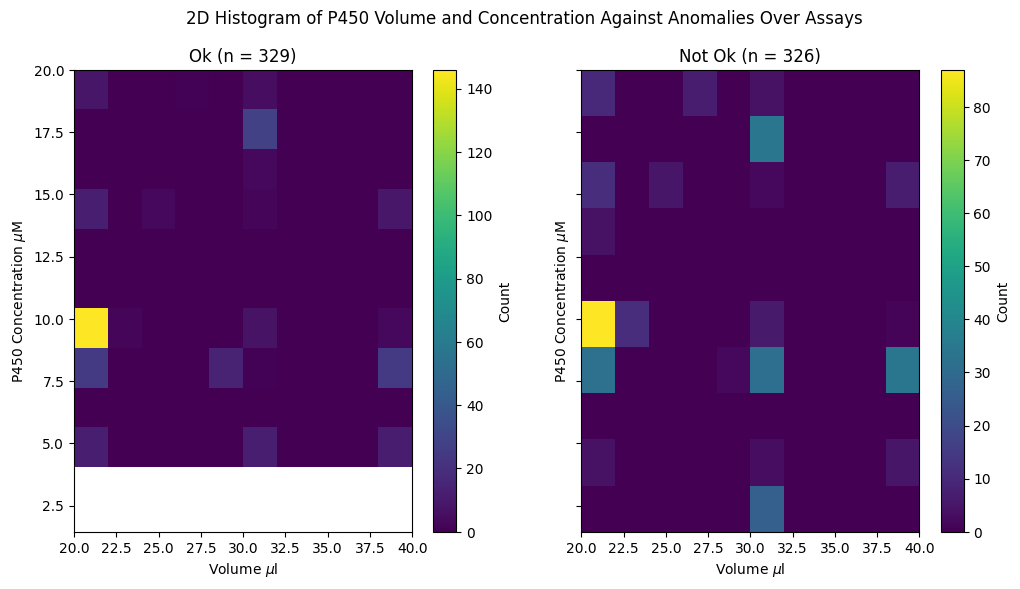

In [6]:
x_ok =  x.loc[x['ok'] == True, :]
x_not_ok =  x.loc[x['ok'] != True, :]


fig, axs = plt.subplots(1, 
                        2, 
                        figsize=(12,6),
                        sharey=True,
                       )

for data, label, ax in zip([x_ok, x_not_ok], 
                           [f'Ok (n = {len(x_ok)})', f'Not Ok (n = {len(x_not_ok)})'],
                           axs.flatten(),
                          ):
    h, xedges, yedges, im =  ax.hist2d(data['volume'], 
                                      data['protein_concentration'],
                                      )
    fig.colorbar(im, 
                 ax=ax,
                 label='Count',
                )
    
    ax.set_title(label)
    ax.set_xlabel('Volume $\mu$l')
    ax.set_ylabel('P450 Concentration $\mu$M')
title = '2D Histogram of P450 Volume and Concentration Against Anomalies Over Assays'
save_path = os.path.join(save_dir, title.lower().replace(' ','-') + '.png')
fig.suptitle(title)

plt.savefig(save_path)
plt.show()

## There's not an Obvious Correlation Between P450 Concenttration, Volume and Exclusions


In [6]:
df.comment.value_counts()

low response                  125
no response                   102
noisy                          93
mis dispense protein           87
low signal                     87
                             ... 
scattering at low [ligand]      1
flash                           1
test                            1
a390 shift                      1
a420 doesnt change much         1
Name: comment, Length: 61, dtype: int64

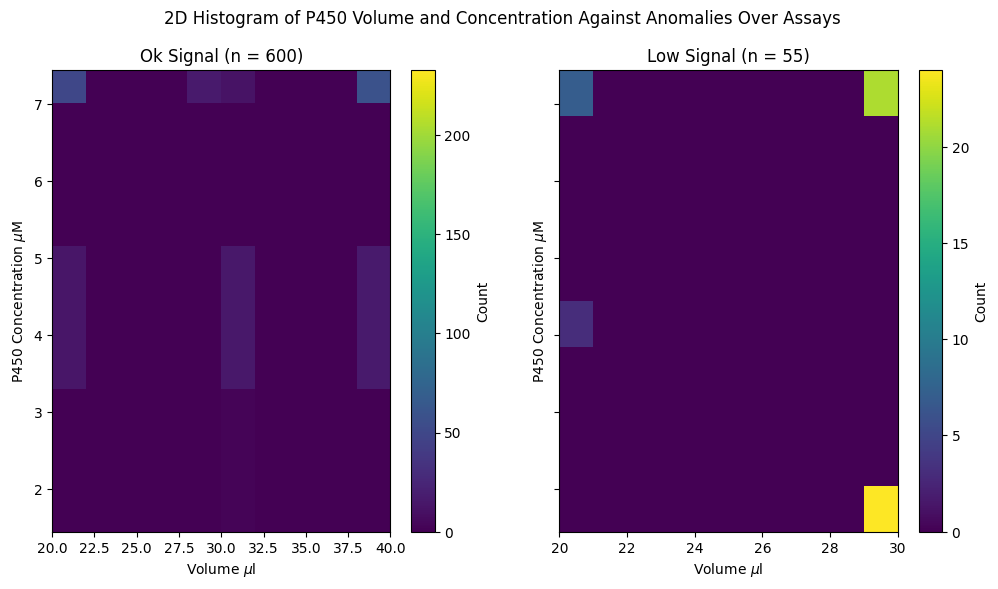

In [8]:
x_ok_signal =  x.loc[x['comment'] != 'low signal', :]
x_low_signal =  x.loc[x['comment'] == 'low signal', :]


fig, axs = plt.subplots(1, 
                        2, 
                        figsize=(12,6),
                        sharey=True,
                       )

for data, label, ax in zip([x_ok_signal, x_low_signal], 
                           [f'Ok Signal (n = {len(x_ok_signal)})', f'Low Signal (n = {len(x_low_signal)})'],
                           axs.flatten(),
                          ):
    h, xedges, yedges, im =  ax.hist2d(data['volume'], 
                                      data['protein_concentration'],
                                      )
    fig.colorbar(im, 
                 ax=ax,
                 label='Count',
                )
    
    ax.set_title(label)
    ax.set_xlabel('Volume $\mu$l')
    ax.set_ylabel('P450 Concentration $\mu$M')
title = '2D Histogram of P450 Volume and Concentration Against Anomalies Over Assays'
save_path = os.path.join(save_dir, title.lower().replace(' ','-') + '.png')
fig.suptitle(title)

#plt.savefig(save_path)
plt.show()

In [13]:
x_low_signal.loc[x_low_signal['protein_concentration'] > 4, ['id', 'experiment_number']]

,id,id,experiment_number
444,347,245.0,15
445,348,246.0,15
446,349,247.0,15
447,350,248.0,15
451,354,252.0,15
452,355,253.0,15
453,356,254.0,15
454,357,255.0,15
455,358,256.0,15
456,359,257.0,15
